In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv("data/mouse_drug_data.csv")
#df1
df2 = pd.read_csv("data/clinicaltrial_data.csv")
# Combine the data into a single dataset
df = df1.merge(df2, on ="Mouse ID", how = "left")

# Display the data table for preview
df.head(47)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
i = df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
# Preview DataFrame
#i.reset_index()
tumorDf = pd.DataFrame(i)
tumorDf_mean = tumorDf.reset_index()
tumorDf_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group2=df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
df3 = pd.DataFrame(group2)
# Preview DataFrame
df_sem = df3.reset_index()
# a=df_sem.loc[df_sem["Drug"]=="Capomulin"]
# a
df_sem

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#df = pd.DataFrame({"a": [1,2,3,1,2,3], "b":[1,1,1,2,2,2], "c":np.random.rand(6)})
#pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)
pivot1 = pd.pivot(tumorDf_mean, index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
standard_error_pivot=pd.pivot(df_sem,index = "Timepoint", columns= "Drug")["Tumor Volume (mm3)"]# values ="Tumor Volume (mm3)")
standard_error_pivot

#standard_error_pivot
# Preview that Reformatting worked 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


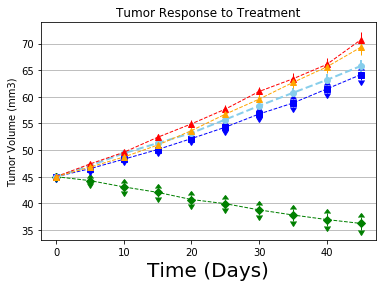

In [5]:
# Generate the Plot (with Error Bars)
plt.xlabel('Time (Days)', fontsize=20)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
# yerr = df3['Tumor Volume (mm3)']
# print(yerr)
drugs_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol']
yerrs = []
# for drug in drugs_list:
#     pass

yerr1 = standard_error_pivot["Capomulin"] #TODO
yerr2 = standard_error_pivot["Ceftamin"]#df3.groupby('Drug').get_group('Ceftamin')['Tumor Volume (mm3)']
yerr3 = standard_error_pivot["Infubinol"]#df3.groupby('Drug').get_group('Infubinol')['Tumor Volume (mm3)']
yerr4 = standard_error_pivot["Ketapril"]#df3.groupby('Drug').get_group('Ketapril')['Tumor Volume (mm3)']
yerr5 = standard_error_pivot["Naftisol"]#df3.groupby('Drug').get_group('Naftisol')['Tumor Volume (mm3)']

plt.errorbar('Timepoint', 'Capomulin', yerr=yerr1, uplims=True, lolims=True,data=pivot1.reset_index(), marker='D', markerfacecolor='green', linestyle='dashed', markersize=6, color='green', linewidth=1)
plt.errorbar('Timepoint', 'Ceftamin', yerr=yerr2, uplims=True, lolims=True, data=pivot1.reset_index(), marker='s', markerfacecolor='blue', linestyle='dashed', markersize=6, color='blue', linewidth=1)
plt.errorbar('Timepoint', 'Infubinol', yerr=yerr3, data=pivot1.reset_index(), marker='o', markerfacecolor='skyblue', linestyle='dashed', markersize=6, color='skyblue', linewidth=2)
plt.errorbar('Timepoint', 'Ketapril', yerr=yerr4, data=pivot1.reset_index(), marker='^', markerfacecolor='red', linestyle='dashed', markersize=6, color='red', linewidth=1)
plt.errorbar('Timepoint', 'Naftisol', yerr=yerr5, data=pivot1.reset_index(), marker='^', markerfacecolor='orange', linestyle='dashed', markersize=6, color='orange', linewidth=1)
plt.grid(axis='y')
# # plt.show()
# Save the Figure#plt

In [6]:
df3.groupby(['Drug','Timepoint'])

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group2=df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
df3 = pd.DataFrame(group2)
# Preview DataFrame
df3 = df3.reset_index()
df3


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [9]:

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
g2 =df.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
df55= pd.DataFrame(g2)
# Preview DataFrame
df55=df55.reset_index()
df55

MetMeanPivot = pd.pivot(df55, index="Timepoint", columns="Drug")["Metastatic Sites"]
MetMeanPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group5=df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
SemMet= pd.DataFrame(group5)
# Preview DataFrame
SemMet = SemMet.reset_index()
SemMet

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot2 = pd.pivot(SemMet, index = "Timepoint", columns = "Drug")["Metastatic Sites"]
#standard_error_pivot=pd.pivot(df3,index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]# values ="Tumor Volume (mm3)")
pivot2
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


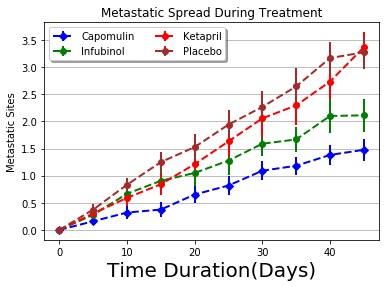

In [12]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
# plt.xlabel('Time (Days)', fontsize=20)
# plt.ylabel('Tumor Volume (mm3)')
# plt.title('Tumor Response to Treatment')
# # yerr = df3['Tumor Volume (mm3)']
# # print(yerr)
# drugs_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol']
# yerrs = []
# for drug in drugs_list:
#     pass
# yerr1 = standard_error_pivot["Capomulin"] #TODO
# yerr2 = standard_error_pivot["Ceftamin"]#df3.groupby('Drug').get_group('Ceftamin')['Tumor Volume (mm3)']
# yerr3 = standard_error_pivot["Infubinol"]#df3.groupby('Drug').get_group('Infubinol')['Tumor Volume (mm3)']
# yerr4 = standard_error_pivot["Ketapril"]#df3.groupby('Drug').get_group('Ketapril')['Tumor Volume (mm3)']
# yerr5 = standard_error_pivot["Naftisol"]#df3.groupby('Drug').get_group('Naftisol')['Tumor Volume (mm3)']

yerr1 = pivot2["Capomulin"] #TODO
yerr2 = pivot2["Infubinol"]
yerr3 = pivot2["Ketapril"]
yerr4 = pivot2["Capomulin"]
yerr5 = pivot2["Placebo"]
# plt.errorbar('Timepoint', 'Capomulin', yerr=yerr1, uplims=True, lolims=True,data=pivot1.reset_index(), marker='D', markerfacecolor='green', linestyle='dashed', markersize=6, color='green', linewidth=2)
# plt.errorbar('Timepoint', 'Ceftamin', yerr=yerr2, uplims=True, lolims=True, data=pivot1.reset_index(), marker='s', markerfacecolor='blue', linestyle='dashed', markersize=6, color='blue', linewidth=2)
# plt.errorbar('Timepoint', 'Infubinol', yerr=yerr3, data=pivot1.reset_index(), marker='o', markerfacecolor='skyblue', linestyle='dashed', markersize=6, color='skyblue', linewidth=2)
# plt.errorbar('Timepoint', 'Ketapril', yerr=yerr4, data=pivot1.reset_index(), marker='^', markerfacecolor='red', linestyle='dashed', markersize=6, color='red', linewidth=2)
# plt.errorbar('Timepoint', 'Naftisol', yerr=yerr5, data=pivot1.reset_index(), marker='^', markerfacecolor='orange', linestyle='dashed', markersize=6, color='orange', linewidth=2)
# # # plt.show()

# Save the Figure

# Show the Figure

plt.xlabel('Time Duration(Days)', fontsize=20)
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
#yerr = df55['Metastatic Sites']
plt.errorbar('Timepoint', 'Capomulin', yerr=yerr1, uplims=False, lolims=False,data=MetMeanPivot.reset_index(), marker='D', markerfacecolor='blue',linestyle='dashed', markersize=6, color='blue', linewidth=2)
#plt.errorbar('Timepoint', 'Ceftamin', yerr=yerr2, uplims=True, lolims=True, data=pivot2.reset_index(), marker='s', markerfacecolor='blue', linestyle='dashed', markersize=6, color='blue', linewidth=2)
plt.errorbar('Timepoint', 'Infubinol', yerr=yerr2, data=MetMeanPivot.reset_index(), marker='o', markerfacecolor='green', linestyle='dashed', markersize=6, color='green', linewidth=2)

plt.errorbar('Timepoint', 'Ketapril', yerr=yerr3, data=MetMeanPivot.reset_index(), marker='o', markerfacecolor='red', linestyle='dashed', markersize=6, color='red', linewidth=2)

plt.errorbar('Timepoint', 'Placebo', yerr=yerr5, data=MetMeanPivot.reset_index(), marker='o', markerfacecolor='brown', linestyle='dashed', markersize=6, color='brown', linewidth=2)
plt.legend(loc='best', shadow=True,ncol=2, fancybox=True);#['blue','green','red','brown'], ['Capom'.....])
plt.grid(axis='y')

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# i = df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

MeanTumorVolumeData = df.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
MeanTumorVolumeDataDf= pd.DataFrame(MeanTumorVolumeData).reset_index()
# Preview DataFrame
MeanTumorVolumeDataDf

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames
pivot77 = pd.pivot(MeanTumorVolumeDataDf,index = "Timepoint", columns = "Drug")\
["Tumor Volume (mm3)"]
# Preview the Data Frame
pivot77

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


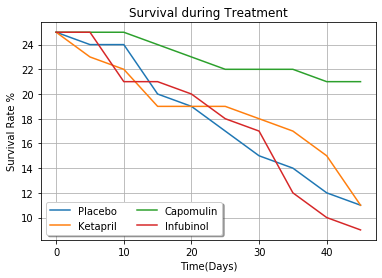

In [15]:
# Generate the Plot (Accounting for percentages)
thingsToGraph=["Placebo","Ketapril","Capomulin","Infubinol"]
plt.plot(pivot77[thingsToGraph])
# Save the Figure
plt.title("Survival during Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate %")
plt.legend(loc='best', shadow=True,ncol=2, labels= thingsToGraph)
# Show the Figure
plt.grid()
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
zz=df.loc[df["Timepoint"]==45].groupby("Drug").mean()
zz["Tumor Change from Day 0"] = zz["Tumor Volume (mm3)"]-45#45 is the starting datapoint on day 0
zz["Percent Changed"] = (zz["Tumor Change from Day 0"]/45)*100
zz
# Display the data to confirm


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Change from Day 0,Percent Changed
Drug,,,,,
Capomulin,45.0,36.236114,1.476190,-8.763886,-19.475303
Ceftamin,45.0,64.132421,2.692308,19.132421,42.516492
Infubinol,45.0,65.755562,2.111111,20.755562,46.123472
Ketapril,45.0,70.662958,3.363636,25.662958,57.028795
Naftisol,45.0,69.265506,2.538462,24.265506,53.923347
Placebo,45.0,68.084082,3.272727,23.084082,51.297960
Propriva,45.0,66.258529,2.571429,21.258529,47.241175
Ramicane,45.0,34.955595,1.250000,-10.044405,-22.320900
Stelasyn,45.0,68.438310,1.727273,23.438310,52.085134


In [17]:
# Store all Relevant Percent Changes into a Tuple
tupel1= tuple(zz["Percent Changed"])
tupel1

(-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525)

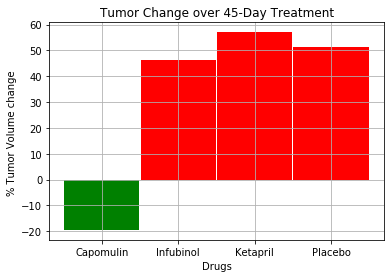

In [23]:
plt.bar(x=0,height=tupel1[0],width=.98,color="green")
plt.bar(x=1,height=tupel1[2],width=.98,color="red")
plt.bar(x=2,height=tupel1[3],width=.98,color="red")
plt.bar(x=3,height=tupel1[5],width=.99,color="red")
plt.grid()
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume change ")
plt.title("Tumor Change over 45-Day Treatment")
plt.xticks([0,1,2,3], labels=["Capomulin","Infubinol","Ketapril","Placebo"]);


#plt.autolabel(rects, xpos='center')

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)